# Keras로 ANN (Artifitial Neural Network)모델을 이용하여 MNIST (필기체 숫자 데이터) 학습하는 예제


---
-  Input node: 784,  은닉층 :100, 출력 : 10개를 갖는 ANN 모델
-  MNIST 필기체 숫자 데이터는 흑백으로 되어 있으며, 28 x 28 픽셀로 구성되는 Image임  

## 1. 사용할 모듈 불러오기


In [0]:
from keras import layers, models;

noIn = 784
noHL = 100
noClass = 10
noOut = noClass

Using TensorFlow backend.


## 2. 학습모델 구성하기


In [0]:
model = models.Sequential()
model.add(layers.Dense(noHL, activation = 'relu', input_shape=(noIn, )))
model.add(layers.Dense(noOut, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


W0702 11:07:39.865778 139999805994880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0702 11:07:39.893346 139999805994880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0702 11:07:39.896584 139999805994880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0702 11:07:39.929272 139999805994880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0702 11:07:39.955142 139999805994880 deprecation_wrappe

In [0]:
# 중간에 module을 불러와도 됩니다.
import numpy as np
from keras import datasets #mnist
from keras.utils import np_utils #to_categorical

##  3. 데이터 불러오기 및 가공하기

In [0]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

X_train.shape, y_train.shape, X_test.shape,y_test.shape,

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [0]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
L, W, H = X_train.shape

X_train = X_train.reshape(-1, W * H)
X_test = X_test.reshape(-1, W * H)

X_train  = X_train / 255
X_test = X_test / 255

## 4. 모델 학습시키기 (Validataion 포함)
## 5. 학습된 모델을 사용하여 모델 성능 평가하기 (Test)

In [0]:
history = model.fit(X_train, Y_train, epochs = 15, batch_size = 100, validation_split=0.2)
performance_test = model.evaluate(X_test, Y_test, batch_size = 100)
                                 
print('Model Test Loss and Accuracy -> ', performance_test)

W0702 11:13:47.707163 139999805994880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0702 11:13:47.760819 139999805994880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 3s 59us/step - loss: 0.3991 - acc: 0.8923 - val_loss: 0.2119 - val_acc: 0.9416
Epoch 2/15
48000/48000 [==============================] - 2s 48us/step - loss: 0.1851 - acc: 0.9472 - val_loss: 0.1603 - val_acc: 0.9540
Epoch 3/15
48000/48000 [==============================] - 2s 48us/step - loss: 0.1361 - acc: 0.9607 - val_loss: 0.1330 - val_acc: 0.9618
Epoch 4/15
48000/48000 [==============================] - 2s 48us/step - loss: 0.1060 - acc: 0.9699 - val_loss: 0.1194 - val_acc: 0.9647
Epoch 5/15
48000/48000 [==============================] - 2s 47us/step - loss: 0.0860 - acc: 0.9756 - val_loss: 0.1125 - val_acc: 0.9657
Epoch 6/15
48000/48000 [==============================] - 3s 53us/step - loss: 0.0722 - acc: 0.9793 - val_loss: 0.1023 - val_acc: 0.9708
Epoch 7/15
48000/48000 [==============================] - 3s 54us/step - loss: 0.0605 - acc: 0.9825 - val_loss: 0.1004 - val_acc

## 6. 그래프로 학습 과정을 살펴보자

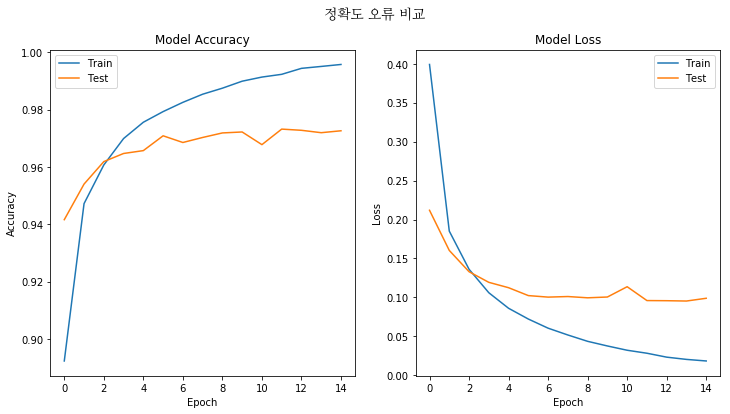

In [0]:
import matplotlib

import matplotlib.pyplot as plt


path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
fontprop = matplotlib.font_manager.FontProperties(fname=path, size=14)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['Train', 'Test'], loc=0)

plt.subplot(122)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc=0)
plt.suptitle("정확도 오류 비교",fontproperties=fontprop)
plt.show()